In [1]:
import json
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from modules.metrics import divergence_plot

In [46]:
def global_stats(data):

    n_trials = len(data)

    print(f"Dataset: {data[0]['dataset']}")
    print(f"Model Accuracy: {data[0]['mlp_accuracy']:.3f}")
    print("______________________________________________")

    stats = {
        'no_avg': [],
        'ground_avg': [],
        'method_avg': [],
        'out_ground_avg': [],
        'out_method_avg': [],
    }

    for trial in data:
        
        for key in stats:
            
            stats[key].append(trial[key])

    stats = {key: np.array(vals) for key, vals in stats.items()}

    for key, vals in stats.items():
        
        print(f"{key:>15} | mean = {np.nanmean(vals):.4f} | std = {np.nanstd(vals, ddof=1):.4f}")

In [71]:
def q1_plot(data):

    f1_scores = np.array([trial['f1'] for trial in data], dtype=float)
    ground_avg = np.array([trial['ground_avg'] for trial in data], dtype=float)
    method_avg = np.array([trial['method_avg'] for trial in data], dtype=float)

    mask = ~np.isnan(f1_scores)  & ~np.isnan(method_avg) & ~np.isnan(ground_avg)
    f1_scores = f1_scores[mask]
    ground_avg = ground_avg[mask]
    method_avg = method_avg[mask]

    df = pd.DataFrame({
        "F1 Score": np.concatenate([f1_scores, f1_scores]),
        "Average JS Divergence": np.concatenate([ground_avg, method_avg]),
        "Source": ["Ground MB Features"] * len(f1_scores) + ["Estimated MB Features"] * len(f1_scores)
    })

    fig = px.scatter(
        df,
        x="F1 Score",
        y="Average JS Divergence",
        color="Source",
        title="Average Jensen–Shannon Divergence vs F1 Score",
        color_discrete_map={
            "Ground MB Features": "#808080",
            "Estimated MB Features": "#0096FF",
        },
    )

    fig.update_traces(marker = dict(size = 10, opacity = 0.8, line = dict(width = 1, color = 'black')))

    fig.update_layout(
        template = "plotly_white",
        legend_title_text = "Source",
        xaxis = dict(title = "F1 Score", showgrid = True, gridcolor = "rgba(200,200,200,0.3)"),
        yaxis = dict(title = "JS Divergence", showgrid = True, gridcolor = "rgba(200,200,200,0.3)"),
        title_font = dict(size = 19, family = "Latin Modern Roman"),
        font = dict(family = "Latin Modern Roman", size = 19),
        hovermode = "closest"
    )

    fig.show()

In [72]:
def q2_plot(data):
    
    method_avg = np.array([trial['method_avg'] for trial in data], dtype = float)
    lime_avg = np.array([trial['lime_avg'] for trial in data], dtype = float)
    shap_avg = np.array([trial['shap_avg'] for trial in data], dtype = float)


    df = pd.DataFrame({
        "Trial": np.tile(np.arange(len(method_avg)), 3),
        "JS Divergence": np.concatenate([lime_avg, shap_avg, method_avg]),
        "Method": ["LIME"] * len(lime_avg) + ["SHAP"] * len(shap_avg) + ["Estimated MB"] * len(method_avg)
    })

    fig = px.scatter(
        df,
        x = "Trial",
        y = "JS Divergence",
        color = "Method",
        title = "Jensen–Shannon Divergence per Trial",
        color_discrete_map = {
            "LIME": "#32CD32",
            "SHAP": "#FF0000",
            "Estimated MB": "#0437F2"
        }
    )
    
    fig.update_traces(marker = dict(size = 10, opacity = 0.8, line = dict(width = 1, color = 'black')))
    fig.update_layout(
        template = "plotly_white",
        legend_title_text = "Source",
        xaxis = dict(title = "Trial", showgrid = True, gridcolor = "rgba(200,200,200,0.3)"),
        yaxis = dict(title = "JS Divergence", showgrid = True, gridcolor = "rgba(200,200,200,0.3)"),
        font = dict(family = "Latin Modern Roman", size = 20),
        title_font = dict(family = "Latin Modern Roman", size = 20),
        hovermode = "closest"
    )
    fig.show()

Dataset: asia
Model Accuracy: 0.865
______________________________________________
         no_avg | mean = 0.1433 | std = 0.0706
     ground_avg | mean = 0.0208 | std = 0.0270
     method_avg | mean = 0.0028 | std = 0.0083
 out_ground_avg | mean = 0.1359 | std = 0.0616
 out_method_avg | mean = 0.1408 | std = 0.0690


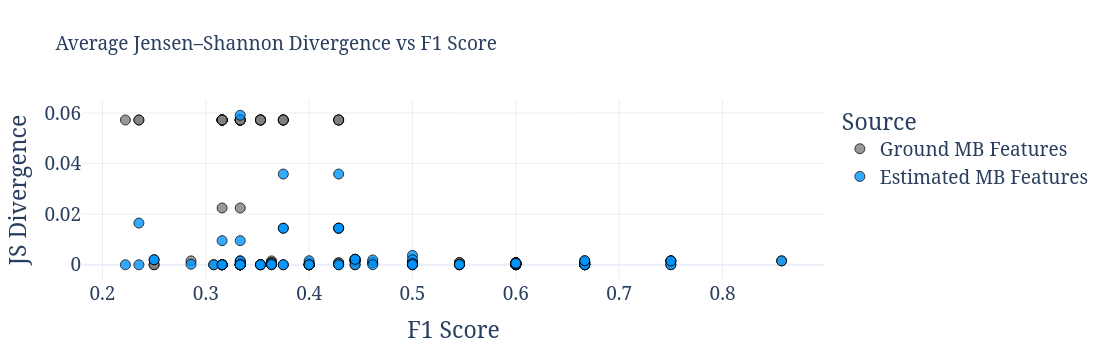

Dataset: alarm
Model Accuracy: 0.922
______________________________________________
         no_avg | mean = 0.1392 | std = 0.0893
     ground_avg | mean = 0.0045 | std = 0.0104
     method_avg | mean = 0.0032 | std = 0.0068
 out_ground_avg | mean = 0.0634 | std = 0.0657
 out_method_avg | mean = 0.0803 | std = 0.0809


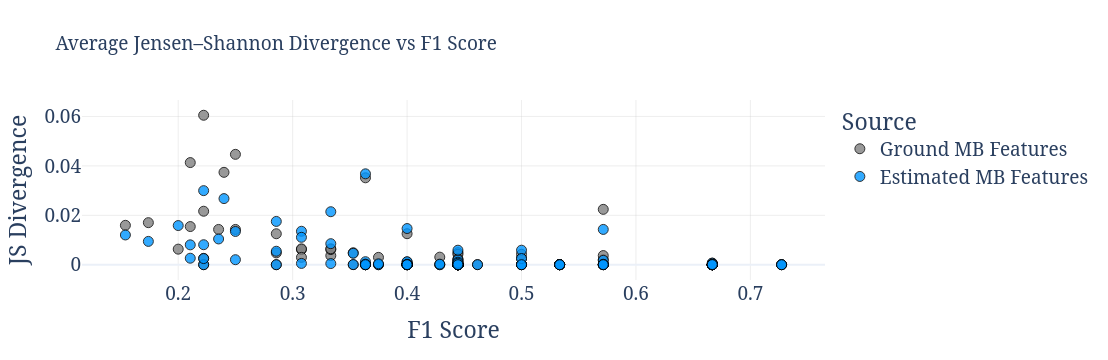

Dataset: insurance
Model Accuracy: 0.952
______________________________________________
         no_avg | mean = 0.6049 | std = 0.1694
     ground_avg | mean = 0.0091 | std = 0.0463
     method_avg | mean = 0.0089 | std = 0.0357
 out_ground_avg | mean = 0.1622 | std = 0.1815
 out_method_avg | mean = 0.2348 | std = 0.1849


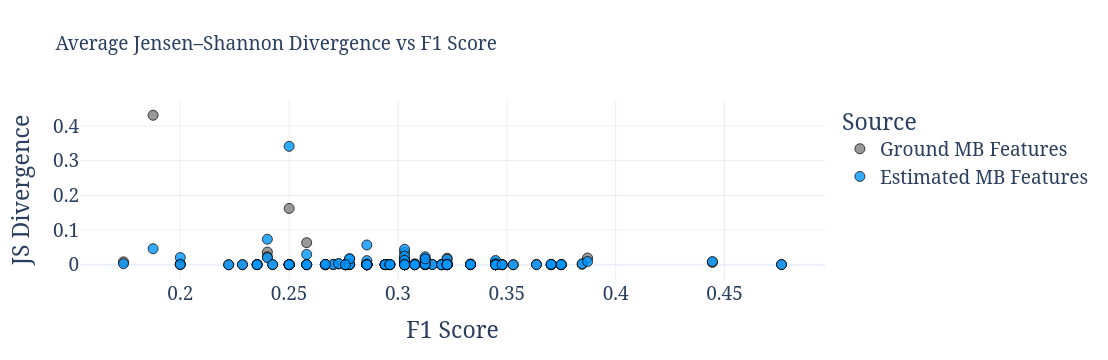

In [73]:
datasets = ['asia', 'alarm', 'insurance']

for name in datasets:
    
    data = json.load(open(f"./data/results/{name}.json"))
    global_stats(data)
    q1_plot(data)